titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


## About the Data:

**survival**: Survival
* 0 = No
* 1 = Yes

**pclass**: A proxy for socio-economic status (SES)
* 1 = 1st (Upper)
* 2 = 2nd (Middle)
* 3 = 3rd (Lower)

**sex**: Sex

**age**: Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

**parch:** number of parents / children aboard the Titanic. The dataset defines family relations in this way:

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation
* C = Cherbourg
* Q = Queenstown
* S = Southampton

In [3]:
# import nessesary libraries
# for worknig with data
import numpy as np 
import pandas as pd 
# fro visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# read train.csv dataset into Randas data Frame df
df = pd.read_csv('./data/train.csv')

In [5]:
#check what we have
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


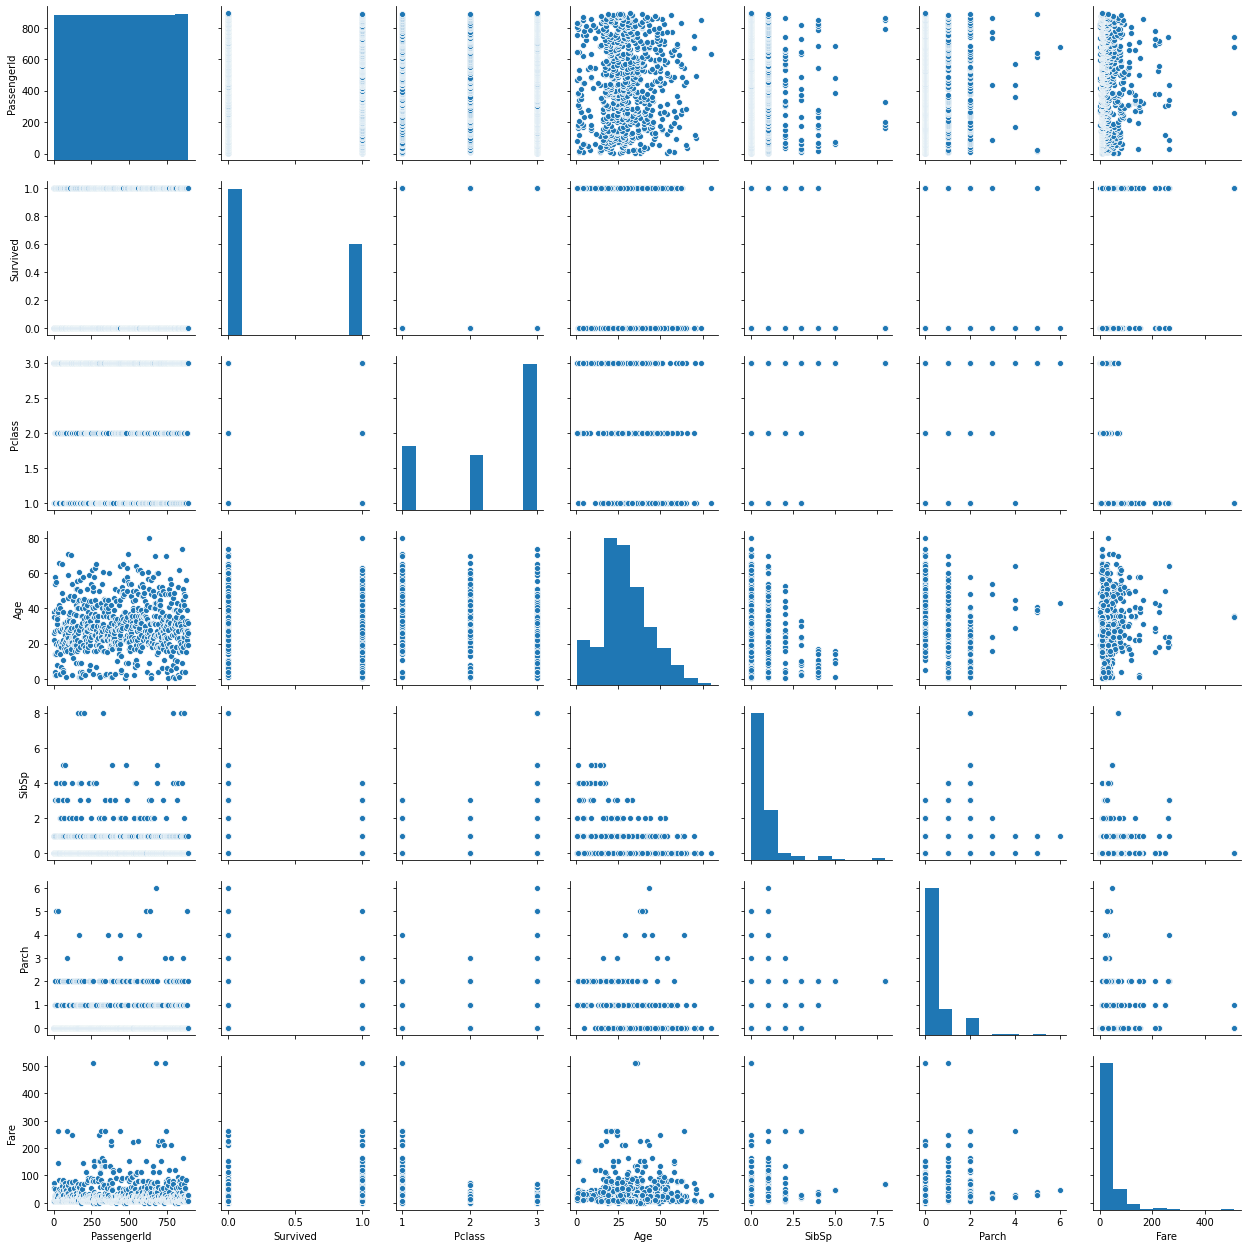

In [7]:
sns.pairplot(data=df)

In [8]:
# check some statistical information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [11]:
# for faster work with columns
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
# look at numeric and categorical values separately 
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

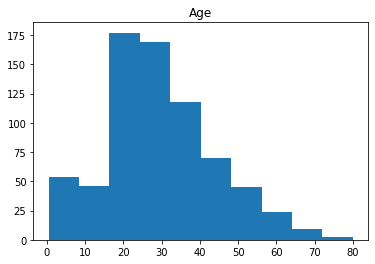

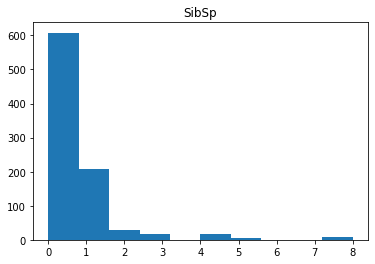

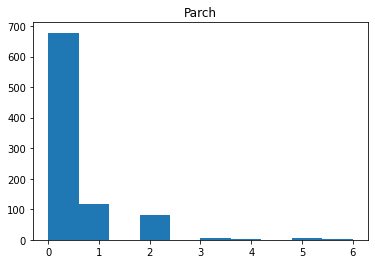

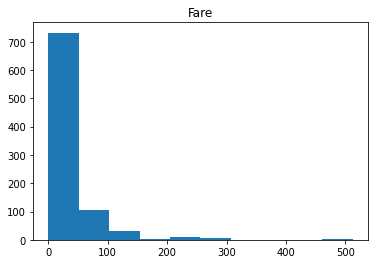

In [14]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
plt.figure(figsize=(5,5))
# kind = 'pie' ~ Pie Chart
# figsize=(8,8) ~ we can cahnge size of all figure
# explode=[0.02,0] ~ white line between two pieces of our pie, if we increase number 0.02 piece of pie "fly away" from chart
# autopct='%.0f%%'  ~ how we see numbers on the chart
# 
df.Sex.value_counts().plot(kind = 'pie', figsize=(8,8), explode=[0.02,0],autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

In [ ]:
df.Age.value_counts().plot(kind = 'pie', figsize=(8,8),autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

In [ ]:
# from name columns we can find a prefix
# Library to work with Regular Expressions
import re
df['prefix'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [ ]:
df.prefix.value_counts().plot(kind = 'pie', figsize=(8,8),autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

In [ ]:
df.prefix.value_counts().plot(kind = 'bar', figsize=(13,5),fontsize=20)
plt.ylabel('Quantity')
plt.xlabel("Preferred address to the person")
plt.xticks(rotation=45)

In [ ]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
df

In [ ]:
sns.countplot("Age_cat",data=df,hue="Sex")

In [ ]:
gb_df=pd.pivot_table(df, index=['Age_cat','Sex'], values='PassengerId',aggfunc=len)
gb_df.info()
gb_df.reset_index(inplace=True)
gb_df.set_index("Age_cat", inplace = True)
gb_df.info()

In [ ]:
# separate the different groups to be plotted
x_male = gb_df[gb_df["Sex"] == "male"]['PassengerId']
#x_male.drop('Sex', axis=1, inplace=True)
x_male

In [ ]:
x_female = -gb_df[gb_df["Sex"] == "female"]['PassengerId']

#x_female.drop('Sex', axis=1, inplace=True)
x_female

In [ ]:
# Useful for:
# The population chart is a type of funnel chart.
# It really helps out to see the gain/loss of certain amount at every stage in a process.

# More info: 
# https://en.wikipedia.org/wiki/Population_pyramid

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = './data/email_campaign_funnel.csv'
df1 = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
gb_df1 = df1.groupby(["Stage", "Gender"])["Users"].sum().to_frame().reset_index()
gb_df1.set_index("Stage", inplace = True)
gb_df1
# separate the different groups to be plotted
x_male1 = gb_df1[gb_df1["Gender"] == "Male"]["Users"]
x_male1

In [ ]:
# separate the different groups to be plotted
x_male1 = gb_df1[gb_df1["Gender"] == "Male"]["Users"]
x_male1
x_female1= gb_df1[gb_df1["Gender"] == "Female"]["Users"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_male1.index, x_male1, color = "red", alpha = 0.3, label = "Male pyramid")
ax.barh(x_female1.index, x_female1, color = "green", alpha = 0.3, label = "Female pyramid")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "upper left", fontsize = 12)
# set xlabel
ax.set_xlabel("Users", fontsize = 12)
# set the title for the plot
ax.set_title("Population Pyramid", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

In [ ]:
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_male.index, x_male, color = "red", alpha = 0.3, label = "Male pyramid")
ax.barh(x_female.index, x_female, color = "green", alpha = 0.3, label = "Female pyramid")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "upper left", fontsize = 12)
# set xlabel
ax.set_xlabel("", fontsize = 12)
# set the title for the plot
ax.set_title("Population Pyramid", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()